# Astropy

### What is it?

A set of Python modules for astrophysics. It contains many useful functions for dealing with datasets, astronomical coordinates, astrometry, units, etc. The astropy project tries to maintain fairly high coding standards, and astropy modules are maintained and regularly updated.

### How do I install it?

If you're on a \*nix system, then you have a couple of ways of installing astropy. In order of my preference:

1. Using `pip`, which is a package manager for Python:
   `pip install --user astropy` *or* `sudo pip install astropy`.
2. Using your system's package manager. In Ubuntu/Debian, this would be
   `sudo apt-get install python-astropy`.
3. Using Anaconda, which is another package manager for Python: `conda install -c anaconda astropy`.

There are more instructions [here](http://docs.astropy.org/en/stable/install.html).

### And now, for something completely different

In this notebook, we'll briefly touch on a couple of astropy's sub-packages. There are many we won't cover, however. Take a look at the [astropy documentation](http://astropy.readthedocs.io/en/stable/index.html) to get an overview of the sub-packages they have.

## Let's import some useful packages first

In [154]:
from __future__ import print_function, division # Do this for Python 2/3 compatibility

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Units (astropy.units)

A number of astropy modules use astropy.units to keep track of units. This can help avoid headaches and bugs, because the quantities being passed around to different functions always have units attached to them. You won't have to wonder whether the variable `dist` is in units of parsecs or kiloparsecs. It will contain that information.

In [4]:
import astropy.units as u

Let's define some arrays of distances:

In [24]:
d1 = np.random.random(5) * u.m    # u.meter also works
d2 = np.random.random(5) * u.pc   # u.parsec also works

print(d1)
print(d2)

[ 0.47784266  0.58558688  0.19914588  0.94928348  0.47979048] m
[ 0.47685909  0.80493623  0.88376093  0.05962728  0.1930782 ] pc


Let's take the ratio of these different distances:

In [25]:
print(d2/d1)

[ 0.99794166  1.37458037  4.43775644  0.06281293  0.40242192] pc / m


We can ask astropy.units to evaluate `pc / m`:

In [26]:
print((d2/d1).decompose())

[  3.07932622e+16   4.24151183e+16   1.36934855e+17   1.93820445e+15
   1.24174428e+16]


Let's try out some different units of angle:

In [33]:
theta1 = 1.7 * u.deg
theta2 = 25. * u.arcsec

print((theta1/theta2).decompose())

244.8


We can do conversions between coordinates:

In [42]:
print('{:.5g} = {:.5g} = {:.5g}'.format(theta1, theta1.to(u.rad), theta1.to(u.arcmin)))

1.7 deg = 0.029671 rad = 102 arcmin


Notice as well how astropy.units plays nicely with Python string formatting in the line above.

We can convert any quantity to [cgs](https://en.wikipedia.org/wiki/Centimetre%E2%80%93gram%E2%80%93second_system_of_units) or [SI](https://en.wikipedia.org/wiki/International_System_of_Units):

In [57]:
print(d2.si)
print(d2.cgs)

[  1.47143342e+16   2.48377367e+16   2.72700128e+16   1.83990547e+15
   5.95777085e+15] m
[  1.47143342e+18   2.48377367e+18   2.72700128e+18   1.83990547e+17
   5.95777085e+17] cm


There are several other useful features of astropy.units, which we don't have time to go into here. Take a look at the documentation [here](http://astropy.readthedocs.io/en/stable/units/index.html).

# Constants (astropy.constants)

This module defines some physical constants.

In [44]:
import astropy.constants as const

Let's take a look at the gravitational constant:

In [47]:
print(const.G)

  Name   = Gravitational constant
  Value  = 6.67384e-11
  Uncertainty  = 8e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2010


Notice how there are several pieces of information included here. We can take a look at the uncertainty, which is given in the same units as the constant itself:

In [63]:
print(const.G.uncertainty)

8e-15


Each constant is a `Quantity` object from astropy.units, so we can do all the things we saw above. For example, let's calculate the Schwarzschild radius of the Sun:

In [70]:
r_s = const.G * const.M_sun / const.c**2

print('r_s = {:.3g} = {:.3g}'.format(r_s.to(u.km), r_s.to(u.AU)))

r_s = 1.48 km = 9.87e-09 AU


# Coordinates (astropy.coordinates)

This module allows you to convert between different spherical coordinate systems. Like astropy.constants, it uses astropy.units heavily.

In [73]:
from astropy.coordinates import SkyCoord

There are a couple of different ways to define coordinates. We'll try out a few below:

In [81]:
c1 = SkyCoord(100., 45., frame='galactic', unit='deg')
c2 = SkyCoord(60.*u.deg, -25.*u.deg, frame='galactic')
c3 = SkyCoord('10h50m35.3s', '+12d17m1.0s', frame='icrs')
c3 = SkyCoord('10:50:35.3', '+12:17:1.0', frame='icrs', unit=(u.hourangle, u.deg))

Notice how we've been defining a `frame` for each `SkyCoord` object. The `frame` is the celestial coordinate system. Some common systems are `galactic`, `icrs` and `fk5`. The latter two are different variants of equatorial coordinates.

We can also define arrays of coordinates:

In [83]:
ra = 360. * np.random.random(5)
dec = 180. * np.random.random(5) - 90.

c4 = SkyCoord(ra*u.deg, dec*u.deg, frame='fk5')

print(c4)

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    [(183.75193724, 78.20470676), (26.62355028, -84.23850118),
     (266.84193659, 65.75355802), (186.09807557, -58.7149587),
     (200.68501341, -57.95460265)]>


We can transform betwee different coordinate systems:

In [88]:
c4_gal = c4.transform_to('galactic')
c4_icrs = c4.transform_to('icrs')

print(c4_gal)
print(c4_icrs)

<SkyCoord (Galactic): (l, b) in deg
    [(125.30990164, 38.75483206), (301.30519666, -32.71486375),
     (95.48017798, 31.10507021), (299.41825433, 3.97215669),
     (307.08857739, 4.66429541)]>
<SkyCoord (ICRS): (ra, dec) in deg
    [(183.75195809, 78.20470892), (26.62360412, -84.23850096),
     (266.84193651, 65.75355264), (186.09805973, -58.71495678),
     (200.68499736, -57.95460224)]>


Let's extract the RA and Dec of `c4` in the ICRS system:

In [97]:
print(c4_icrs.ra)
print(c4_icrs.ra.value)
print(c4_icrs.ra.unit)
print('')
print(c4_icrs.dec)
print(c4_icrs.dec.value)
print(c4_icrs.dec.unit)

[u'183d45m07.0491s' u'26d37m24.9748s' u'266d50m30.9714s' u'186d05m53.015s'
 u'200d41m05.9905s']
[ 183.75195809   26.62360412  266.84193651  186.09805973  200.68499736]
deg

[u'78d12m16.9521s' u'-84d14m18.6035s' u'65d45m12.7895s' u'-58d42m53.8444s'
 u'-57d57m16.5681s']
[ 78.20470892 -84.23850096  65.75355264 -58.71495678 -57.95460224]
deg


Finally, we can include distances in sky coordinates, like so:

In [102]:
c5 = SkyCoord(45.*u.deg, 10.*u.deg, distance=1.*u.kpc, frame='galactic')
print(c5)
print('d = {}'.format(c5.distance))
print('x, y, z = {}'.format(c5.cartesian))

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    (45.0, 10.0, 1.0)>
d = 1.0 kpc
x, y, z = (0.696364240320019, 0.6963642403200189, 0.17364817766693033) kpc


One more cool thing in `astropy.coordinates`:

In [108]:
from astropy.coordinates import EarthLocation
EarthLocation.of_site('Cerro Tololo Interamerican Observatory')

<EarthLocation (1814303.7455372282, -5214365.7436216, -3187340.5659875614) m>

# ASCII Tables (astropy.io.ascii)

A veritable Swiss-army knife for ASCII tables.

In [111]:
from astropy.io import ascii

The two basic functions are `ascii.read()` and `ascii.write()`.

People often distribute ASCII tables in their own pet format, so you end up writing custom code to read each new ASCII table you encounter. The function `ascii.read()` will attempt to figure out the format of the file by itself. This usually works, as we show below with three different files:

In [115]:
data = ascii.read('ascii1.txt')
print(data)

obsid redshift  X    Y      object  
----- -------- ---- ---- -----------
 3102     0.32 4167 4085 Q1250+568-A
  877     0.22 4378 3892   Source 82


In [143]:
data = ascii.read('ascii2.txt')
print(data)

obsid redshift  X    Y      object  
----- -------- ---- ---- -----------
 3102     0.32 4167 4085 Q1250+568-A
  877     0.22 4378 3892   Source 82


We can extract values from the table like so:

In [124]:
print(data['obsid'][1])

877


With some files, `ascii.read()` is not able to guess the format, and needs some help:

In [142]:
data = ascii.read('ascii3.txt')

InconsistentTableError: 
ERROR: Unable to guess table format with the guesses listed below:
Reader:Ecsv fill_values: [('', '0')] strict_names: True
Reader:FixedWidthTwoLine fill_values: [('', '0')] strict_names: True
Reader:FastBasic fill_values: [('', '0')] strict_names: True
Reader:Basic fill_values: [('', '0')] strict_names: True
Reader:Rdb fill_values: [('', '0')] strict_names: True
Reader:FastTab fill_values: [('', '0')] strict_names: True
Reader:Tab fill_values: [('', '0')] strict_names: True
Reader:Cds fill_values: [('', '0')] strict_names: True
Reader:Daophot fill_values: [('', '0')] strict_names: True
Reader:SExtractor fill_values: [('', '0')] strict_names: True
Reader:Ipac fill_values: [('', '0')] strict_names: True
Reader:Latex fill_values: [('', '0')] strict_names: True
Reader:AASTex fill_values: [('', '0')] strict_names: True
Reader:FastCommentedHeader delimiter: '|' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '|' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ',' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ',' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: ' ' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastCommentedHeader delimiter: '\\s' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '|' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '|' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ',' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ',' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: ' ' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: ' ' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:CommentedHeader delimiter: '\\s' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:CommentedHeader delimiter: '\\s' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '|' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '|' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ',' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ',' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: ' ' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: ' ' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastBasic delimiter: '\\s' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastBasic delimiter: '\\s' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: '|' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: '|' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: ',' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: ',' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: ' ' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: ' ' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic delimiter: '\\s' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:Basic delimiter: '\\s' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '|' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '|' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ',' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ',' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: ' ' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: ' ' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:FastNoHeader delimiter: '\\s' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:FastNoHeader delimiter: '\\s' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '|' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '|' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ',' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ',' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: ' ' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: ' ' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:NoHeader delimiter: '\\s' fill_values: [('', '0')] quotechar: '"' strict_names: True
Reader:NoHeader delimiter: '\\s' fill_values: [('', '0')] quotechar: "'" strict_names: True
Reader:Basic fill_values: [('', '0')]

************************************************************************
** ERROR: Unable to guess table format with the guesses listed above. **
**                                                                    **
** To figure out why the table did not read, use guess=False and      **
** appropriate arguments to read().  In particular specify the format **
** and any known attributes like the delimiter.                       **
************************************************************************

We give `ascii.read()` some hints, and then it works:

In [141]:
data = ascii.read('ascii3.txt', format='fixed_width', data_start=2)
print(data)

obsid redshift  X    Y   object
----- -------- ---- ---- ------
 3102     0.32 4167 4085 Q1250+
  877     0.22 4378 3892 "Sourc


# FITS Files (astropy.io.fits)

[FITS](https://en.wikipedia.org/wiki/FITS) is a widely used data format for astronomical images and tables, and `astropy.io.fits` (which you might also know under its old name, `pyfits`) is a widely used Python library for manipulating FITS files.

In [144]:
import astropy.io.fits as fits

Let's try to open a FITS file:

In [145]:
fname = 'dss17460a27m.fits'
hdulist = fits.open(fname)

Let's see what's inside this FITS file:

In [147]:
hdulist.info()

Filename: dss17460a27m.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     128   (59, 60)     int16   


FITS files are organized into "Header-Data Units" ("HDUs" for short). Each HDU contains a header describing the structure, meaning, provenance, etc. of the data, followed by the data itself. There are different types of HDUs, among them: PrimaryHDU (the first HDU is always one of these), ImageHDU (containing an image), CompImageHDU (containing a compressed image), TableHDU (containing a table of data), BinTableHDU (ditto, but stored in a binary format).

The file we have has only one HDU, which is a PrimaryHDU.

We access a particular HDU just like we would get an item from a list. Let's look at the data in the first (and only) HDU in our FITS file:

In [152]:
hdulist[0].data

array([[6996, 6996, 6889, ..., 7456, 7671, 7671],
       [7211, 7211, 6889, ..., 7456, 7671, 7241],
       [7211, 6996, 6459, ..., 7671, 7456, 7564],
       ..., 
       [6748, 6748, 6748, ..., 8068, 7638, 7745],
       [6425, 6640, 6533, ..., 8068, 7853, 7638],
       [6855, 7070, 6963, ..., 7853, 7638, 7853]], dtype=int16)

Let's plot it using `matplotlib`:

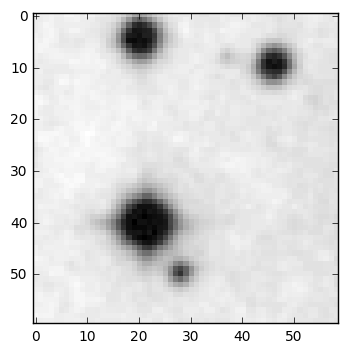

In [157]:
plt.imshow(hdulist[0].data, cmap='binary', interpolation='nearest');

Now, let's close this FITS file:

In [158]:
hdulist.close()

Next, we'll be making our own file with table data. We begin by making a structured numpy array, which we'll fill with some arbitrary data:

In [163]:
dtype = [
    ('x', 'f8'),
    ('y', 'f8'),
    ('velocity', 'f8'),
    ('objid', 'i4'),
    ('objname', 'S10')  # A string with a maximum length of 10 characters
]

data = np.empty(5, dtype=dtype)
data['x'][:] = np.random.random(5)
data['y'][:] = np.random.random(5)
data['velocity'][:] = np.random.random(5)
data['objid'][:] = np.arange(5)
data['objname'][:] = 'a b c d e'.split()

Now, we'll create an HDU that stores this data:

In [167]:
hdu = fits.BinTableHDU(data=data)

Now, we'll create an HDUList (which could, in principle, have several HDUs, rather than just one), and we'll write it out to a file. The HDU requires a primary HDU, which we'll add in:

In [178]:
hdulist = fits.HDUList([fits.PrimaryHDU(), hdu]) # We need a dummy primary HDU
hdulist.writeto('my_table.fits', clobber=True)  # clobber=True means that any existing file will be overwritten
hdulist.close()

That was just a very short intro to FITS files and `astropy.io.fits`. You'll probably have to heal with a lot of these files, and [the documentation](http://docs.astropy.org/en/stable/io/fits/index.html) will be very helpful.

# World Coordinate System (astropy.wcs)

The World Coordinate System (WCS) is a system for translating between coordinates in an astronomical image and coordinates on the sky. If you ever deal with raw images, you'll need to use WCS.

In [179]:
import astropy.wcs as wcs

Normally, FITS images contain WCS information. We'll grab the WCS from the FITS image we opened earlier:

In [194]:
fname = 'dss17460a27m.fits'
hdulist = fits.open(fname)

w = wcs.WCS(hdulist[0].header)
hdulist.close()

The two basic things WCS does is allow you to go from "world" (i.e., sky) coordinates to "pixel" (i.e., image) coordinates, and vice versa. First, we'll go from pixel to world coordinates:

In [195]:
pix_coords = np.array([
    [10., 5.],
    [3., 8.],
    [20.5, 10.1]
])

world_coords = w.wcs_pix2world(pix_coords, 1)

print(world_coords)

[[ 92.35575456  20.47703492]
 [ 92.35786299  20.47784226]
 [ 92.35263803  20.47850844]]


In this case, the "world coordinates" are RA and Dec.

We can go from world coordinates to pixel coordinates as well:

In [196]:
world_coords = np.array([
    [92.356, 20.4775],
    [92.353, 20.4779]
])

pix_coords = w.wcs_world2pix(world_coords, 1)

print(pix_coords)

[[  9.20644676   6.67592584]
 [ 19.25541064   7.9442807 ]]


# Convolution (astropy.convolve)

Astropy contains some useful convolution functions, allowing you to set kernels flexibly, and dealing with NaNs.

In [197]:
import astropy.convolution as conv

Let's begin with our FITS image:

In [214]:
hdulist = fits.open(fname)
img_orig = hdulist[0].data[:]
hdulist.close()

We define a kernel (there are many types we could choose), and then apply the convolution:

In [215]:
kern = conv.Gaussian2DKernel(5.)

img_smooth = conv.convolve(img_orig, kern, boundary='extend')

Let's plot the results. The original is on the left, and the smoothed image on the right:

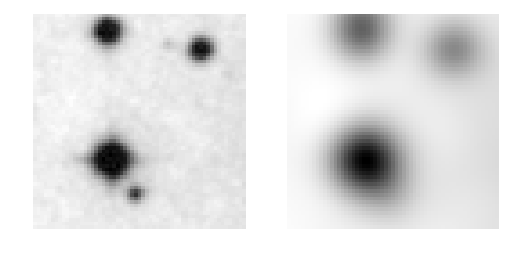

In [217]:
fig = plt.figure()

ax = fig.add_subplot(1,2,1)
ax.imshow(img_orig, cmap='binary', interpolation='nearest')
ax.axis('off')

ax = fig.add_subplot(1,2,2)
ax.imshow(img_smooth, cmap='binary', interpolation='nearest')
ax.axis('off');

One nice thing about `astropy.convolution` is that it deals with NaNs gracefully:

(-0.5, 58.5, 59.5, -0.5)

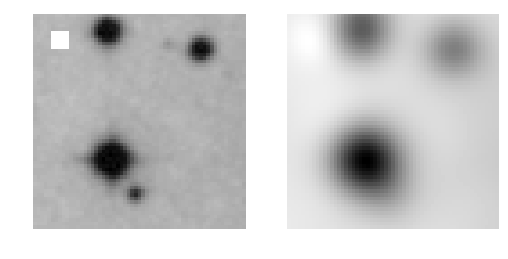

In [211]:
img_orig[5:10, 5:10] = np.nan
img_smooth = conv.convolve(img_orig, kern, boundary='extend')

fig = plt.figure()

ax = fig.add_subplot(1,2,1)
ax.imshow(img_orig, cmap='binary', interpolation='nearest')
ax.axis('off')

ax = fig.add_subplot(1,2,2)
ax.imshow(img_smooth, cmap='binary', interpolation='nearest')
ax.axis('off')